In [1]:
library(ggplot2)
library(cowplot)
library(forcats)
library(ggrepel)
library(dplyr)
library(reshape2)
library(patchwork)
library(tidyr)
library(mmtable2)
library(ggalt)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths



Attaching package: ‘mmtable2’


The following object is masked from ‘package:tidyr’:

    table1


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Timepoint A

In [7]:
clusters_timepoint_A_size <- read.csv("../outputFiles/clusters/clusters_timepoint_A_size.csv")
clusters_timepoint_A_size$timepoint <- 'A'
summary(clusters_timepoint_A_size)

    cluster    irish_samples     timepoint        
 Min.   :  1   Min.   : 1.000   Length:113        
 1st Qu.: 29   1st Qu.: 1.000   Class :character  
 Median : 57   Median : 1.000   Mode  :character  
 Mean   : 57   Mean   : 1.522                     
 3rd Qu.: 85   3rd Qu.: 1.000                     
 Max.   :113   Max.   :30.000                     

In [8]:
clusters_timepoint_B_size <- read.csv("../outputFiles/clusters/clusters_timepoint_B_size.csv")
clusters_timepoint_B_size$timepoint <- 'B'

clusters_timepoint_C_size <- read.csv("../outputFiles/clusters/clusters_timepoint_C_size.csv")
clusters_timepoint_C_size$timepoint <- 'C'

clusters_timepoint_D_size <- read.csv("../outputFiles/clusters/clusters_timepoint_D_size.csv")
clusters_timepoint_D_size$timepoint <- 'D'

clusters_timepoint_E_size <- read.csv("../outputFiles/clusters/clusters_timepoint_E_size.csv")
clusters_timepoint_E_size$timepoint <- 'E'

clusters_timepoint_F_size <- read.csv("../outputFiles/clusters/clusters_timepoint_F_size.csv")
clusters_timepoint_F_size$timepoint <- 'F'

In [10]:
clusters_timepoint_size <- rbind(clusters_timepoint_A_size,
      clusters_timepoint_B_size,
      clusters_timepoint_C_size,
      clusters_timepoint_D_size,
      clusters_timepoint_E_size,
      clusters_timepoint_F_size)
summary(clusters_timepoint_size)

    cluster       irish_samples      timepoint        
 Min.   :   1.0   Min.   :  1.000   Length:3389       
 1st Qu.: 202.0   1st Qu.:  1.000   Class :character  
 Median : 484.0   Median :  1.000   Mode  :character  
 Mean   : 525.9   Mean   :  1.467                     
 3rd Qu.: 767.0   3rd Qu.:  1.000                     
 Max.   :1436.0   Max.   :145.000                     

In [71]:
nrow(clusters_timepoint_size[ which(clusters_timepoint_size$irish_samples == 1), ])

[1] 3117

In [72]:
nrow(clusters_timepoint_size)

[1] 3389

In [73]:
3117/3389

[1] 0.9197403

In [76]:
nrow(clusters_timepoint_A_size[ which(clusters_timepoint_A_size$irish_samples == 1), ]) / nrow(clusters_timepoint_A_size)
nrow(clusters_timepoint_B_size[ which(clusters_timepoint_B_size$irish_samples == 1), ]) / nrow(clusters_timepoint_B_size)
nrow(clusters_timepoint_C_size[ which(clusters_timepoint_C_size$irish_samples == 1), ]) / nrow(clusters_timepoint_C_size)
nrow(clusters_timepoint_D_size[ which(clusters_timepoint_D_size$irish_samples == 1), ]) / nrow(clusters_timepoint_D_size)
nrow(clusters_timepoint_E_size[ which(clusters_timepoint_E_size$irish_samples == 1), ]) / nrow(clusters_timepoint_E_size)
nrow(clusters_timepoint_F_size[ which(clusters_timepoint_F_size$irish_samples == 1), ]) / nrow(clusters_timepoint_F_size)

[1] 0.8849558

[1] 0.8148148

[1] 0.8834951

[1] 0.9121447

[1] 0.9463788

[1] 0.8963675

In [78]:
tapply(clusters_timepoint_size$irish_samples, clusters_timepoint_size$timepoint, max)

A   B   C   D   E   F 
 30  14  54 119  26 145

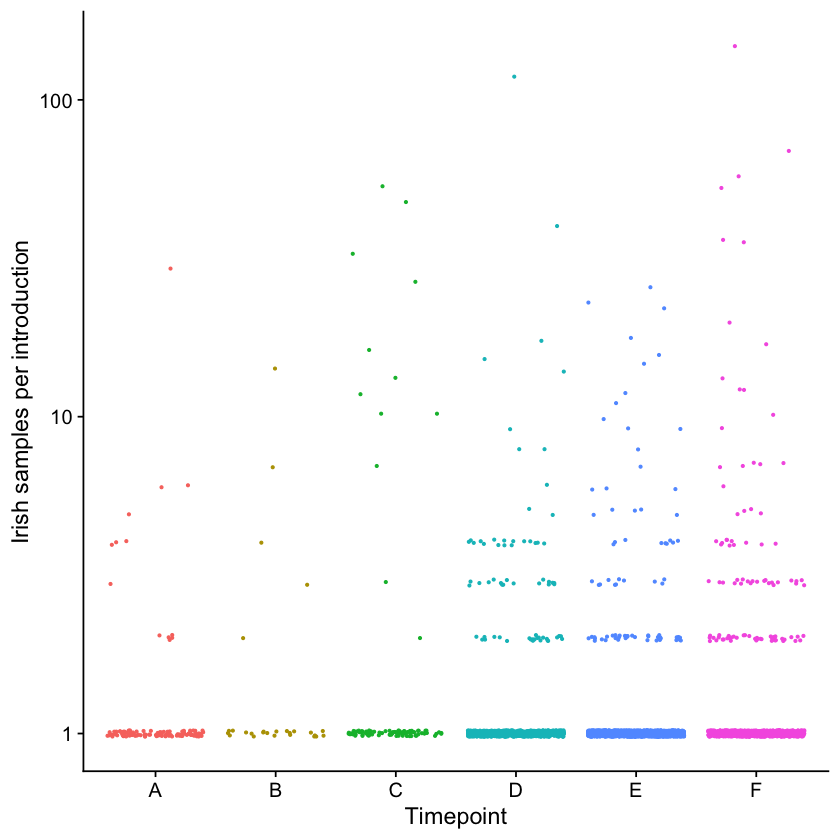

In [66]:
ggplot(clusters_timepoint_size, aes(timepoint, irish_samples, color=timepoint)) + geom_jitter(size=0.5, height = 0.01) + theme_cowplot() + theme(legend.position="none") + scale_y_log10() + labs(x = 'Timepoint', y='Irish samples per introduction')

In [67]:
ggsave('../outputFiles/figures/clusters_timepoint_size.svg', width=16, height=12, units = "cm")

In [68]:
ggsave('../outputFiles/figures/clusters_timepoint_size.pdf', width=16, height=12, units = "cm")

In [105]:
clusters_timepoint_size$num_for_bars <- clusters_timepoint_size$irish_samples
clusters_timepoint_size[ which(clusters_timepoint_size$irish_samples > 8), ]$num_for_bars <- '9+'

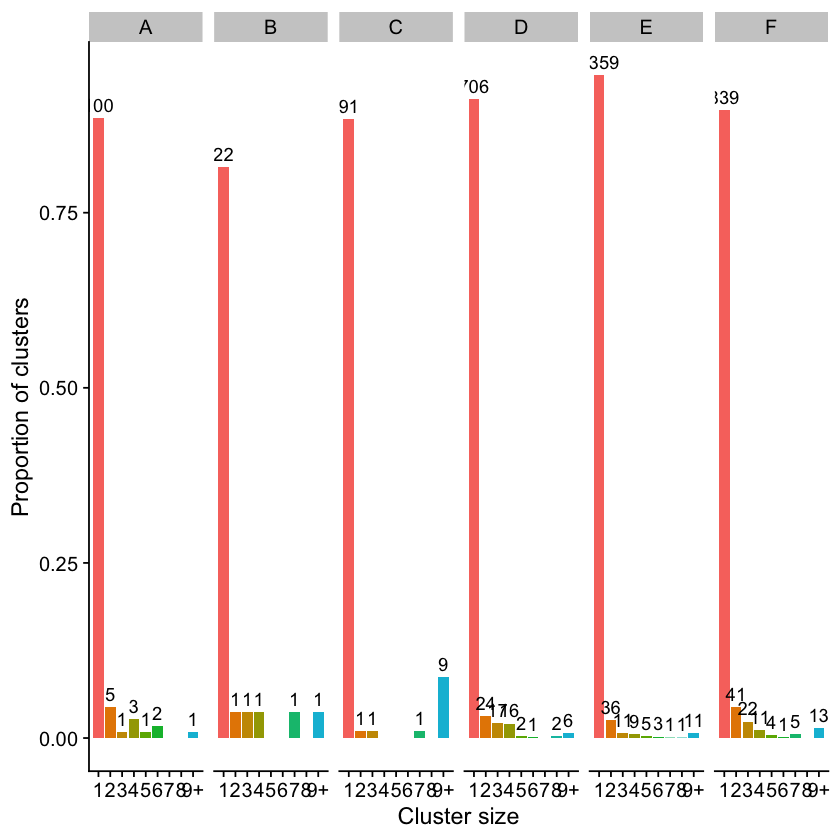

In [127]:
ggplot(clusters_timepoint_size, aes(num_for_bars, fill=timepoint, group = timepoint)) + geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") + theme_cowplot() + theme(legend.position="none") + facet_grid(cols=vars(timepoint)) +
geom_text(aes(label = ..count..,
                   y= ..prop.. ), stat= "count", vjust = -.5, hjust=0.5)  + labs(x = 'Cluster size', y='Proportion of clusters') + scale_x_discrete(expand = expansion(mult = 0.1))

In [130]:
ggsave('../outputFiles/figures/clusters_timepoint_size_bars.svg', width=30, height=12, units = "cm")

In [131]:
ggsave('../outputFiles/figures/clusters_timepoint_size_bars.pdf', width=30, height=12, units = "cm")

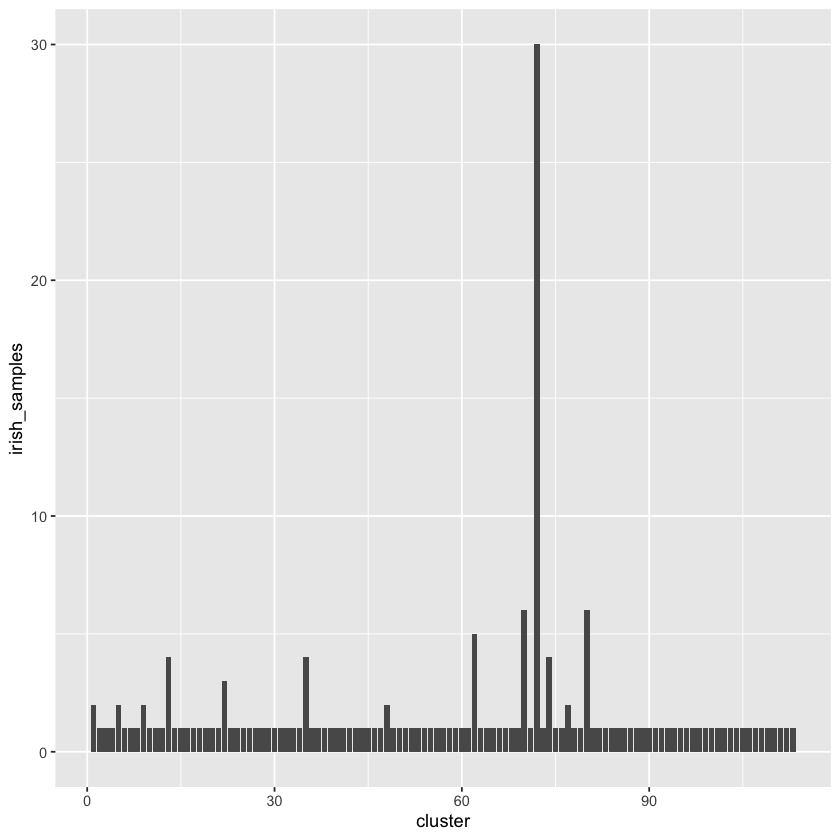

In [3]:
ggplot(clusters_timepoint_A_size, aes(cluster, irish_samples)) + geom_col()

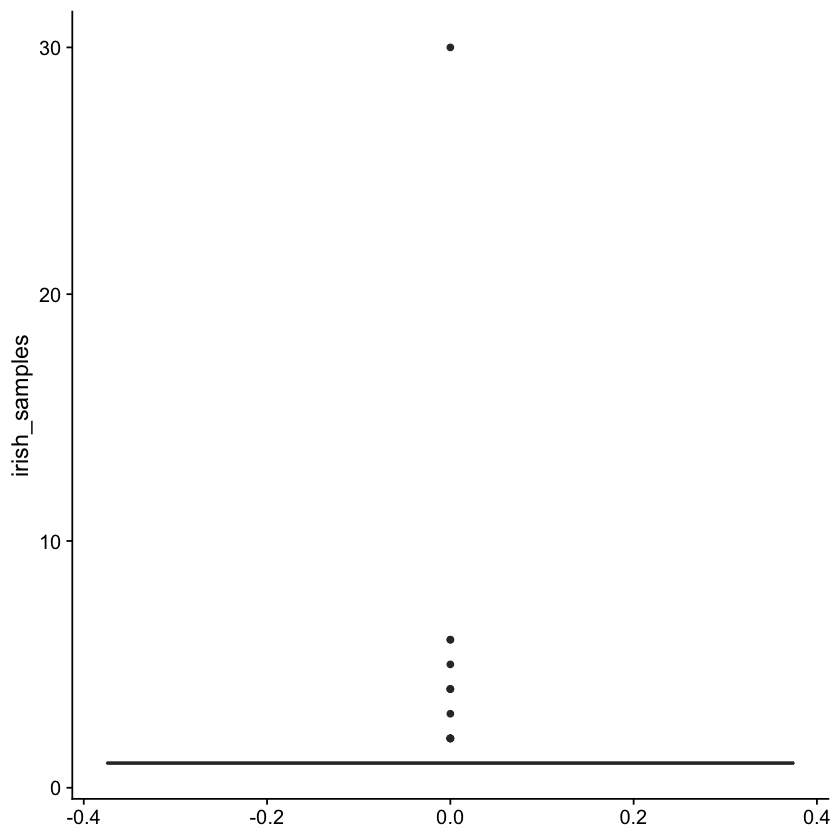

In [6]:
ggplot(clusters_timepoint_A_size, aes(y=irish_samples)) +
theme_cowplot()+
geom_boxplot()

In [3]:
timepoint_1_country_frequency$prop <- timepoint_1_country_frequency$frequency / sum(timepoint_1_country_frequency$frequency)

In [4]:
timepoint_1_country_frequency <- timepoint_1_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [5]:
timepoint_1_country_frequency

country,frequency,prop
<fct>,<int>,<dbl>
England,62,0.558558559
USA,15,0.135135135
Scotland,5,0.045045045
France,4,0.036036036
Netherlands,4,0.036036036
Germany,4,0.036036036
Japan,3,0.027027027
China,3,0.027027027
Spain,2,0.018018018
